# H2HBABBA2243_Rachel_Suraj

# Payment Date Prediction (PDP) Model

## Data Reading Part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('H2HBABBA2243.csv')

In [3]:
dataset.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR trust,2020-02-12 00:00:00,2020.0,1.930465e+09,2020-02-02,20200201,20200202,20200217.0,USD,RV,1.0,NaN,68612.62,20200202.0,NAH4,1.930465e+09,0
1,U001,0200707005,KING S foundation,2019-04-01 00:00:00,2019.0,1.928975e+09,2019-03-17,20190316,20190317,20190401.0,USD,RV,1.0,NaN,17677.82,20190317.0,NAA8,1.928975e+09,0
2,U001,0200722444,PERFOR corporation,NaN,2020.0,1.930583e+09,2020-03-02,20200301,20200302,20200317.0,USD,RV,1.0,NaN,1724.24,20200302.0,NAA8,1.930583e+09,1
3,U001,0200762301,C&S WH,2019-11-22 00:00:00,2019.0,1.929874e+09,2019-09-17,20190916,20190917,20191121.0,USD,RV,1.0,NaN,1583.54,20190917.0,NAGD,1.929874e+09,0
4,U001,0200707822,PUBLI foundation,2019-08-27 00:00:00,2019.0,1.929802e+09,2019-08-27,20190827,20190827,20190911.0,USD,RV,1.0,NaN,82.64,20190827.0,NAA8,1.929802e+09,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
dataset.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

## Preprocessing Part

### Null Column Removal 

In [6]:
# area_business is having all data as Null values
dataset.drop('area_business', axis=1, inplace=True)

### DateTime Conversion and Target Column

In [7]:
# Here since we will be pridicting the Payment Date, so we need to calculate the Delay in the payment
# But first I need to convert them into datetime
# Payment Date is Clear_date
# Delay is Target Column
dataset['due_in_date']=pd.to_datetime(dataset['due_in_date'],format = "%Y%m%d").dt.strftime('%Y-%m-%d')
dataset['due_in_date']=pd.to_datetime(dataset['due_in_date'])
dataset['clear_date']=pd.to_datetime(dataset['clear_date'])
dataset['delay']=dataset['clear_date']-dataset['due_in_date']
dataset["delay"] = (dataset["delay"]).dt.days

In [8]:
dataset['posting_date']=pd.to_datetime(dataset['posting_date'])   #Converting it for later purpose

### Data Slicing

In [9]:
# I will be slicing the dataset into 2 sets real_train, real_test based on clear_date
# real_train will be the dataset where no null values will be present, further it will be used for train, test, val split
# real_test will be the dataset where null values of clear_date will be present, it will be kept separate for testing only
real_train = dataset[dataset.clear_date.isnull()==False]
real_test = dataset[dataset.clear_date.isnull()==True]

### Null Imputation

In [10]:
real_train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                2
isOpen                    0
delay                     0
dtype: int64

In [11]:
# Droping the 2 Null values of invoice_id
real_train=real_train[real_train.invoice_id.isnull()==False]

### Droping unimportant columns

In [12]:
real_train.drop('name_customer', axis=1, inplace=True)
real_train.drop('document_create_date.1', axis=1, inplace=True)
real_train.drop('invoice_currency', axis=1, inplace=True)
real_train.drop('clear_date', axis=1, inplace=True)
real_train.drop('due_in_date', axis=1, inplace=True)
real_train.drop('cust_payment_terms', axis=1, inplace=True)
real_train.drop('cust_number', axis=1, inplace=True)

### Sorting

In [13]:
# I will be sorting data accordint to posting date
real_train.sort_values(by=['posting_date'],inplace=True)

### Spliting

In [14]:
# Separating into X and Y
# Y will be the dataset containing Delay column, Y will be used for pridiction
# Whereas X will be dataset without Delay column, X will be used for Spliting
X = real_train.drop('delay',axis=1)
y = real_train['delay']

In [15]:
# Now spliting X int Train, test and Validation
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

## EDA 

<AxesSubplot:xlabel='delay', ylabel='Density'>

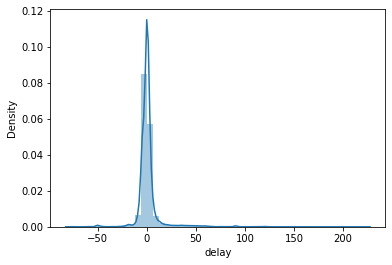

In [16]:
sns.distplot(y_train)

In [17]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,buisness_year,doc_id,posting_date,document_create_date,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,delay
0,33979,U001,2019.0,1.928540e+09,2018-12-30,20181229,RV,1.0,241.57,20181230.0,1.928540e+09,0,1.0
1,31777,U001,2019.0,1.928541e+09,2018-12-30,20181229,RV,1.0,36309.90,20181230.0,1.928541e+09,0,-5.0
2,12417,U001,2019.0,1.928539e+09,2018-12-30,20181229,RV,1.0,11582.37,20181230.0,1.928539e+09,0,-5.0
3,4810,U001,2019.0,1.928535e+09,2018-12-30,20181229,RV,1.0,47642.00,20181230.0,1.928535e+09,0,-5.0
4,42349,U001,2019.0,1.928535e+09,2018-12-30,20181229,RV,1.0,9522.21,20181230.0,1.928535e+09,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,43656,U001,2019.0,1.929981e+09,2019-10-08,20191008,RV,1.0,5779.45,20191001.0,1.929981e+09,0,2.0
27994,1069,U001,2019.0,1.929982e+09,2019-10-08,20191007,RV,1.0,68071.52,20191008.0,1.929982e+09,0,0.0
27995,4695,U001,2019.0,1.929983e+09,2019-10-08,20191008,RV,1.0,5494.80,20191008.0,1.929983e+09,0,0.0
27996,30169,U001,2019.0,1.929982e+09,2019-10-08,20191008,RV,1.0,99.94,20191008.0,1.929982e+09,0,0.0


## Feature Engineering

### Label Encoding and Datatype Conversion

In [18]:
# I will be converting the object datatye to int so that it can be used in understanding coreelation
# Also for some columns I will be using Label Encoder so that to club it in such a way that it is also of int dtyoe


from sklearn.preprocessing import LabelEncoder

In [19]:
X_train.head()

,business_code,buisness_year,doc_id,posting_date,document_create_date,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
33979,U001,2019.0,1.928540e+09,2018-12-30,20181229,RV,1.0,241.57,20181230.0,1.928540e+09,0
31777,U001,2019.0,1.928541e+09,2018-12-30,20181229,RV,1.0,36309.90,20181230.0,1.928541e+09,0
12417,U001,2019.0,1.928539e+09,2018-12-30,20181229,RV,1.0,11582.37,20181230.0,1.928539e+09,0
4810,U001,2019.0,1.928535e+09,2018-12-30,20181229,RV,1.0,47642.00,20181230.0,1.928535e+09,0
42349,U001,2019.0,1.928535e+09,2018-12-30,20181229,RV,1.0,9522.21,20181230.0,1.928535e+09,0


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 33979 to 28295
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27998 non-null  object        
 1   buisness_year         27998 non-null  float64       
 2   doc_id                27998 non-null  float64       
 3   posting_date          27998 non-null  datetime64[ns]
 4   document_create_date  27998 non-null  int64         
 5   document type         27998 non-null  object        
 6   posting_id            27998 non-null  float64       
 7   total_open_amount     27998 non-null  float64       
 8   baseline_create_date  27998 non-null  float64       
 9   invoice_id            27998 non-null  float64       
 10  isOpen                27998 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 2.6+ MB


In [21]:
# Label Encoding business_code
business_encoder = LabelEncoder()
business_encoder.fit(X_train['business_code'])
X_train['business_code'] = business_encoder.transform(X_train['business_code'])
X_test['business_code'] = business_encoder.transform(X_test['business_code'])
X_val['business_code'] = business_encoder.transform(X_val['business_code'])

In [22]:
# Label Encoding document type
document_encoder = LabelEncoder()
document_encoder.fit(X_train['document type'])
X_train['document type'] = document_encoder.transform(X_train['document type'])
X_test['document type'] = document_encoder.transform(X_test['document type'])
X_val['document type'] = document_encoder.transform(X_val['document type'])

In [23]:
# Extracting date, day and month from Posting_date
# day
X_train['posting_day'] = X_train['posting_date'].dt.weekday 
X_val['posting_day'] = X_val['posting_date'].dt.weekday 
X_test['posting_day'] = X_test['posting_date'].dt.weekday  
# date, month, journey
X_train['posting_dt'] = X_train['posting_date'].dt.day
X_train['posting_month'] = X_train['posting_date'].dt.month
X_train['posting_year'] = X_train['posting_date'].dt.year

X_val['posting_dt'] = X_val['posting_date'].dt.day
X_val['posting_month'] = X_val['posting_date'].dt.month
X_val['posting_year'] = X_val['posting_date'].dt.year


X_test['posting_dt'] = X_test['posting_date'].dt.day
X_test['posting_month'] = X_test['posting_date'].dt.month
X_test['posting_year'] = X_test['posting_date'].dt.year

#X_train["delay"] = (X_train["delay"]).dt.days

#Deleting the posting_date
X_train = X_train.drop('posting_date',axis=1)
X_val = X_val.drop('posting_date',axis=1)
X_test = X_test.drop('posting_date',axis=1)


## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

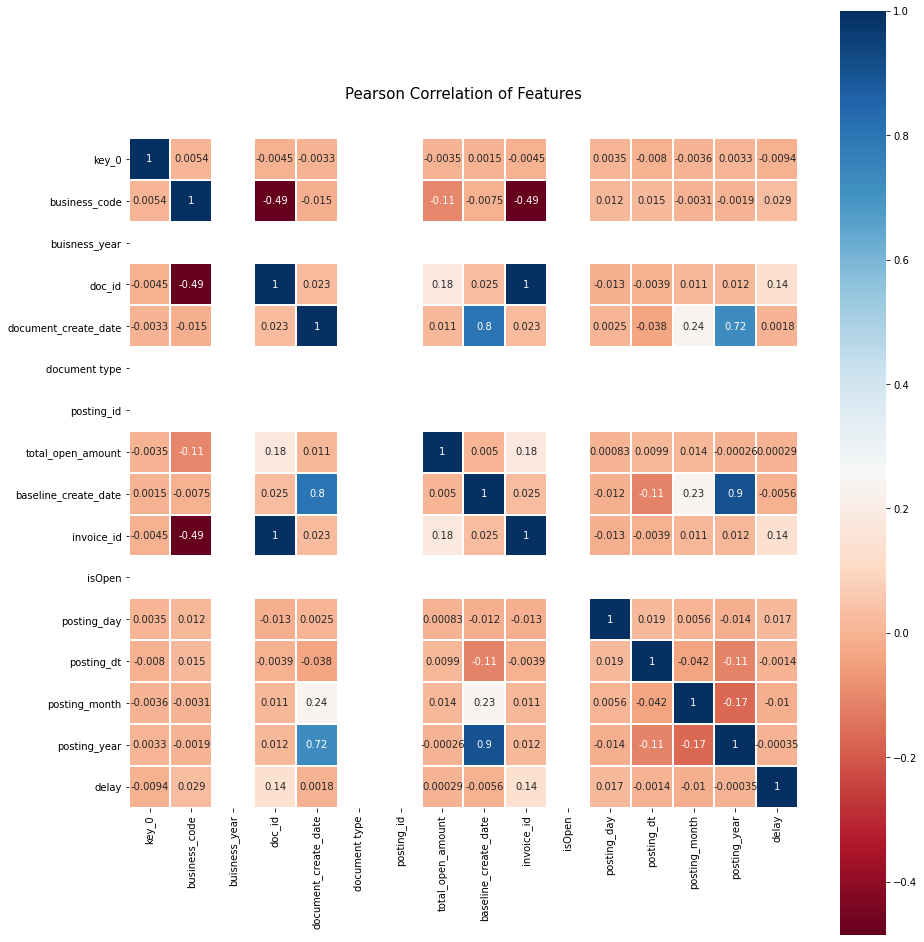

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,17))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Modeling

In [25]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_predict = base_model.predict(X_val)

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.2165383155685445

In [28]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [30]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [31]:
y_predict2 = regressor.predict(X_val)

In [32]:
mean_squared_error(y_val, y_predict2, squared=False)

17.480657345395805

In [33]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

20.15614379425338